O nosso conjunto de dados é descrito da seguinte forma:

|Atributo                                           |   Descrição   |
|---------------------------------------------------|:-------------:|
| Trip Duration                                     |   Duração da viagem em segundos |
| Start Time                                        |   Início da viagem |
| Stop Time                                         |   Fim da Viagem   |
| Start Station ID                                  |   Identificado da estação origem   |
| Start Station Name                                |   Nome da estação onde a viagem iniciou|
| Start Station Latitude / Start Station Longitude  |   Localização onde a viagem iniciou|
| End station id                                    |   Identificado da estação destino   |
| End Station Name                                  |   Nome da estação onde a viagem terminou|
| End Station Latitude / End Station Longitude      |   Localização onde a viagem terminou   |
| Bike ID                                           |   Identificado da bicicleta  |
| User Type                                         |   Customer = passe de 24 horas ou 3 dias; Subscriber = Membro Anual |
| Birth Year                                        |   Ano de nascimento|
| Gender                                            |   0 = desconhecido; 1 = masculino; 2 = feminino |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)   # Mostra todas as colunas do dataset


In [40]:
df = pd.read_parquet('/content/drive/MyDrive/Projeto UFRJ-Analytica/clear dados')   #carregando dados na variavel df

In [41]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,283.0,3/31/2016 09:15:31,3/31/2016 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,-1992.0,1.0
1,392.0,9/5/2016 16:43:30,9/5/2016 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,-1991.0,2.0
2,705.0,4/17/2016 13:16:39,4/17/2016 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0
3,535.0,5/2/2016 17:59:46,5/2/2016 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0
4,286.0,2/6/2016 18:27:29,2/6/2016 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0


In [43]:
df.shape

(4000000, 15)

### Descartando colunas duplicadas

In [44]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [5]:
"""# Fazendo cópia das colunas de interesse e descartando as duplicadas
df = df[['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender']].copy()"""

In [45]:
# Renomeando colunas
df = df.rename(columns={'start station id':'start_station_id',
                   'start station name':'start_station_name',
                   'start station latitude':'start_station_latitude',
                   'start station longitude': 'start_station_longitude',
                   'end station id':'end_station_id',
                   'end station name':'end_station_name',
                   'end station latitude':'end_station_latitude',
                   'end station longitude':'end_station_longitude',
                   'birth year': 'birth_year'})

In [46]:
df.head(5)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,283.0,3/31/2016 09:15:31,3/31/2016 09:20:14,382.0,University Pl & E 14 St,40.734927,-73.992005,491.0,E 24 St & Park Ave S,40.740964,-73.986022,21566.0,Subscriber,-1992.0,1.0
1,392.0,9/5/2016 16:43:30,9/5/2016 16:50:03,3109.0,Banker St & Meserole Ave,40.726060,-73.956210,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,14670.0,Subscriber,-1991.0,2.0
2,705.0,4/17/2016 13:16:39,4/17/2016 13:28:25,354.0,Emerson Pl & Myrtle Ave,40.693631,-73.962236,242.0,Carlton Ave & Flushing Ave,40.697787,-73.973736,21494.0,Subscriber,1979.0,1.0
3,535.0,5/2/2016 17:59:46,5/2/2016 18:08:42,517.0,Pershing Square South,40.751581,-73.977910,357.0,E 11 St & Broadway,40.732618,-73.991580,22901.0,Subscriber,1984.0,1.0
4,286.0,2/6/2016 18:27:29,2/6/2016 18:32:16,490.0,8 Ave & W 33 St,40.751551,-73.993934,446.0,W 24 St & 7 Ave,40.744876,-73.995299,21254.0,Subscriber,1981.0,1.0


### Podemos verificar que na coluna 'birth_year' existem alguns valores negativos o que não faz muito sentido. Devemos ter valores positivos.

In [47]:
df['birth_year']

0         -1992.0
1         -1991.0
2          1979.0
3          1984.0
4          1981.0
            ...  
3999995    1962.0
3999996    1960.0
3999997    1967.0
3999998    1985.0
3999999    1989.0
Name: birth_year, Length: 4000000, dtype: float64

In [48]:
df ['birth_year'] = df['birth_year'].abs()    # Tomando o modulo dos valores de birth_year
df['birth_year']

0          1992.0
1          1991.0
2          1979.0
3          1984.0
4          1981.0
            ...  
3999995    1962.0
3999996    1960.0
3999997    1967.0
3999998    1985.0
3999999    1989.0
Name: birth_year, Length: 4000000, dtype: float64

### Verificando valores NaN values e linhas duplicadas

In [49]:
df.shape

(4000000, 15)

In [50]:
df.isna().sum()   # Mostra o total de valores NaN em cada coluna

tripduration                    0
starttime                       0
stoptime                        0
start_station_id              151
start_station_name            151
start_station_latitude          0
start_station_longitude         0
end_station_id                151
end_station_name              151
end_station_latitude            0
end_station_longitude           0
bikeid                          0
usertype                     3566
birth_year                 214167
gender                          0
dtype: int64

In [51]:
df = df.dropna(how='all', inplace=False)  # Remove linhas onde não há nenhuma informação

In [52]:
df.isna().sum() # Mostra onde ainda temos valores ausentes

tripduration                    0
starttime                       0
stoptime                        0
start_station_id              151
start_station_name            151
start_station_latitude          0
start_station_longitude         0
end_station_id                151
end_station_name              151
end_station_latitude            0
end_station_longitude           0
bikeid                          0
usertype                     3566
birth_year                 214167
gender                          0
dtype: int64

### Verificando datas

In [53]:
# Passando valores das datas de float para tipo date
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Alterando coluna de duração de viagem para minutos
df['tripduration'] = df['tripduration']/60.
df = df.rename(columns={'tripduration':'tripduration_min'})

In [54]:
df.shape

(4000000, 15)

In [55]:
# Podemos ver quantos são homens(1), mulheres(2) e desconhecidos(0)
df['gender'].value_counts()

1.0    2704082
2.0     914750
0.0     381168
Name: gender, dtype: int64

In [17]:
import numpy as np

birth_y = np.array([sorted(df['birth_year'].unique())])

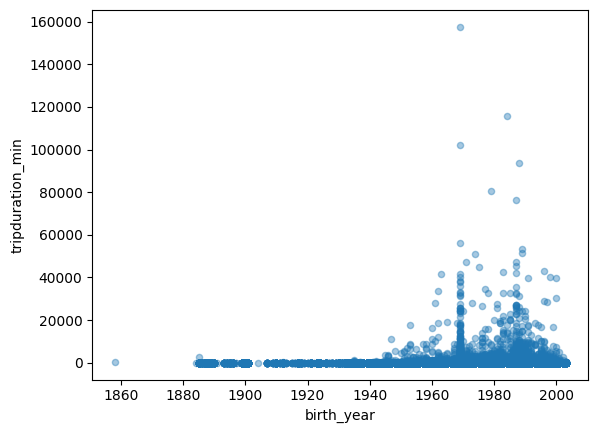

In [56]:
df.plot(kind="scatter", y="tripduration_min", x="birth_year",
 alpha=0.4)
plt.show()

In [57]:
df.loc[df['start_station_name']=="Hs Don't Use"].head(10)

,tripduration_min,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
804164,1.633333,2017-10-02 08:04:46,2017-10-02 08:06:25,3197.0,Hs Don't Use,40.719252,-74.034234,3183.0,Exchange Place,40.716247,-74.033459,26209.0,Subscriber,1984.0,1.0
1151036,4.683333,2017-10-01 18:57:39,2017-10-01 19:02:21,3197.0,Hs Don't Use,40.719252,-74.034234,3480.0,WS Don't Use,0.000000,0.000000,31815.0,Subscriber,1984.0,2.0
1163859,5.300000,2017-10-01 21:51:39,2017-10-01 21:56:58,3197.0,Hs Don't Use,40.719252,-74.034234,3186.0,Grove St PATH,40.719586,-74.043117,26224.0,Subscriber,1988.0,2.0
1200757,1.750000,2017-10-02 07:43:20,2017-10-02 07:45:05,3197.0,Hs Don't Use,40.719252,-74.034234,3183.0,Exchange Place,40.716247,-74.033459,31867.0,Subscriber,NaN,0.0
1249985,4.633333,2017-10-01 17:04:14,2017-10-01 17:08:52,3197.0,Hs Don't Use,40.719252,-74.034234,3481.0,York St,40.716490,-74.041050,29579.0,Subscriber,1990.0,1.0
1456317,5.716667,2017-10-01 10:19:17,2017-10-01 10:25:00,3197.0,Hs Don't Use,40.719252,-74.034234,3214.0,Essex Light Rail,40.712774,-74.036486,31824.0,Subscriber,1985.0,2.0


In [58]:
import plotly.express as px

# Plot do mapa com os pontos das estações
fig = px.scatter_mapbox(
    df,
    lat='start_station_latitude',
    lon='start_station_longitude',
    hover_name='start_station_name',
    zoom=20
)

fig.update_layout(mapbox_style='open-street-map')
fig.show()


In [28]:
df.isna().sum() # Mostra onde ainda temos valores ausentes

tripduration_min                0
starttime                       0
stoptime                        0
start_station_id              184
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                184
end_station_name              184
end_station_latitude            0
end_station_longitude           0
bikeid                          0
usertype                        0
birth_year                 232384
gender                          0
dtype: int64